In [12]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

import geomstats.backend as gs
import geomstats.visualization as visualization
from geomstats.information_geometry.normal import NormalDistributions

normal = NormalDistributions(sample_dim=1)

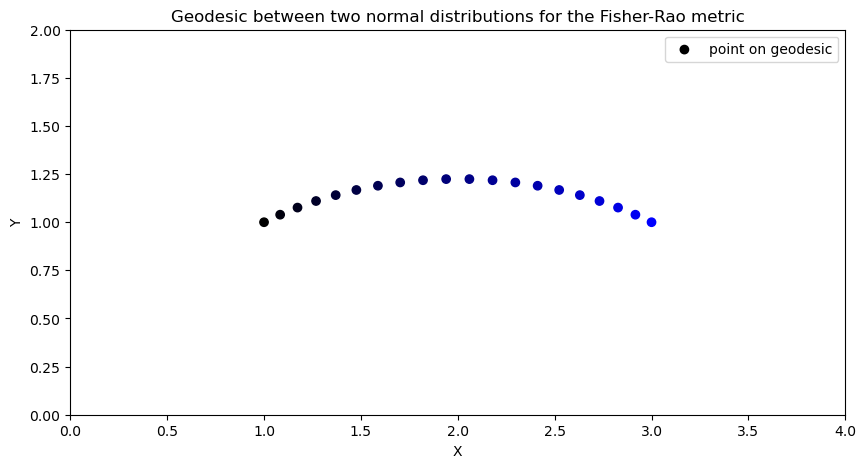

In [13]:
point_a = gs.array([1.0, 1.0])
point_b = gs.array([3.0, 1.0])

geodesic_ab_fisher = normal.metric.geodesic(point_a, point_b)

n_points = 20
t = gs.linspace(0, 1, n_points)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
cc = gs.zeros((n_points, 3))
cc[:, 2] = gs.linspace(0, 1, n_points)

visualization.plot(
    geodesic_ab_fisher(t),
    ax=ax,
    space="H2_poincare_half_plane",
    label="point on geodesic",
    color=cc,
)

ax.set_xlim(0.0, 4.0)
ax.set_ylim(0.0, 2.0)
ax.set_title("Geodesic between two normal distributions for the Fisher-Rao metric")
ax.legend();

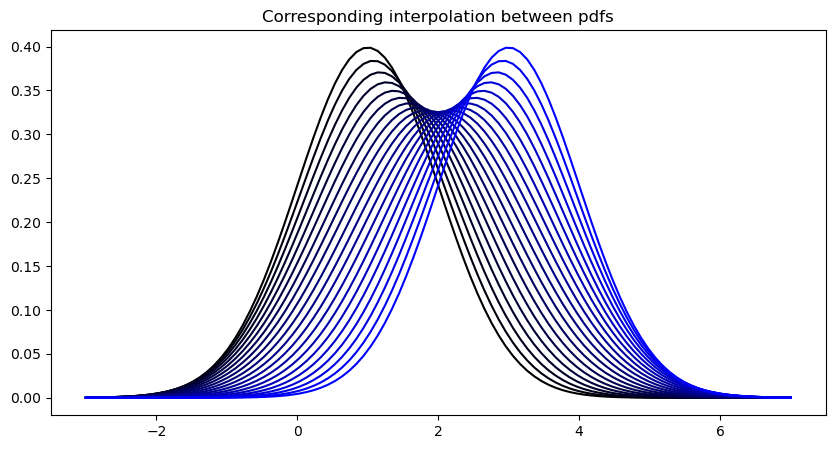

In [14]:
pdfs = normal.point_to_pdf(geodesic_ab_fisher(t))
x = gs.linspace(-3.0, 7.0, 100)

fig = plt.figure(figsize=(10, 5))
for i in range(n_points):
    plt.plot(x, pdfs(x)[i, :], color=cc[i, :])
plt.title("Corresponding interpolation between pdfs");

In [15]:
from geomstats.geometry.euclidean import Euclidean

plane = Euclidean(2)

point_c = gs.array([1.0, 3.0])
point_d = gs.array([3.0, 3.0])

geodesic_cd_fisher = normal.metric.geodesic(point_c, point_d)
geodesic_ab_wasserstein = plane.metric.geodesic(point_a, point_b)
geodesic_cd_wasserstein = plane.metric.geodesic(point_c, point_d)

points = gs.stack((point_a, point_b, point_c, point_d))
pdfs = normal.point_to_pdf(points)

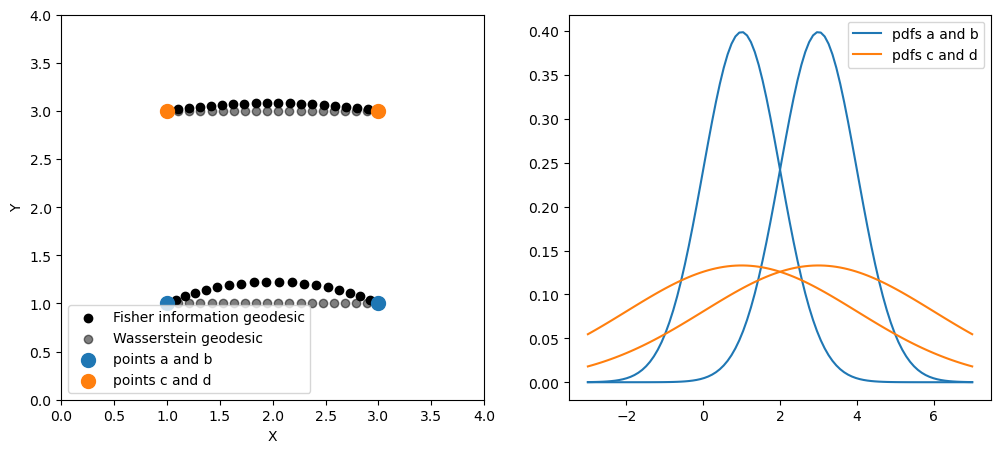

In [16]:
%matplotlib inline

fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(121)

visualization.plot(
    gs.vstack((geodesic_ab_fisher(t), geodesic_cd_fisher(t))),
    ax=ax1,
    space="H2_poincare_half_plane",
    label="Fisher information geodesic",
    color="black",
)
visualization.plot(
    gs.vstack((geodesic_ab_wasserstein(t), geodesic_cd_wasserstein(t))),
    ax=ax1,
    space="H2_poincare_half_plane",
    label="Wasserstein geodesic",
    color="black",
    alpha=0.5,
)
visualization.plot(
    gs.stack((point_a, point_b)),
    ax=ax1,
    space="H2_poincare_half_plane",
    label="points a and b",
    s=100,
)
visualization.plot(
    gs.stack((point_c, point_d)),
    ax=ax1,
    space="H2_poincare_half_plane",
    label="points c and d",
    s=100,
)

ax1.set_xlim(0.0, 4.0)
ax1.set_ylim(0.0, 4.0)
ax1.legend()

ax2 = fig.add_subplot(122)
x = gs.linspace(-3.0, 7.0, 100)
lines = [Line2D([0], [0], color="C0"), Line2D([0], [0], color="C1")]
ax2.plot(x, pdfs(x)[:2, :].T, c="C0")
ax2.plot(x, pdfs(x)[2:, :].T, c="C1")
ax2.legend(lines, ["pdfs a and b", "pdfs c and d"]);

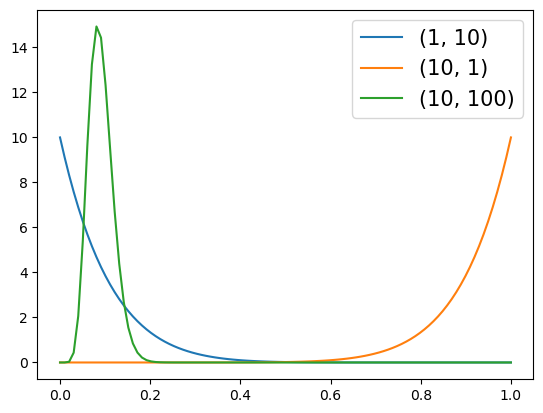

Fisher-Rao distance between blue and yellow:  4.2307202088037466
Fisher-Rao distance between blue and green:  1.7253568493169043
Euclidean distance between blue and yellow:  12.727922061357855
Euclidean distance between blue and green:  90.44888059008801


In [22]:
from geomstats.information_geometry.beta import BetaDistributions

beta = BetaDistributions()

point_a = gs.array([1.0, 10.0])
point_b = gs.array([10.0, 1.0])
point_c = gs.array([10.0, 100.0])

samples = gs.linspace(0.0, 1.0, 100)
points = gs.stack([point_a, point_b, point_c])
pdfs = beta.point_to_pdf(points)(samples)
plt.plot(samples, pdfs.T)
plt.legend(["(1, 10)", "(10, 1)", "(10, 100)"], prop={"size": 15})
plt.show()

print(
    "Fisher-Rao distance between blue and yellow: ", beta.metric.dist(point_a, point_b)
)
print(
    "Fisher-Rao distance between blue and green: ", beta.metric.dist(point_a, point_c)
)

r2 = Euclidean(2)
print("Euclidean distance between blue and yellow: ", r2.metric.dist(point_a, point_b))
print("Euclidean distance between blue and green: ", r2.metric.dist(point_a, point_c))

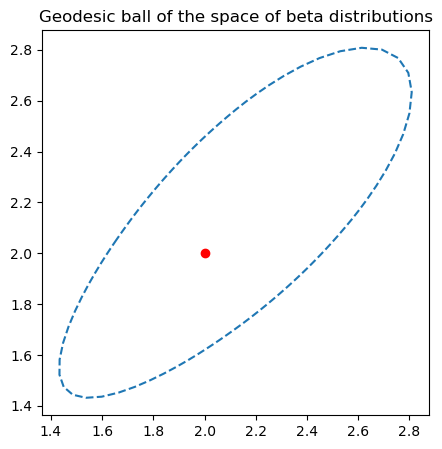

In [23]:
n_rays = 100
center = gs.array([2.0, 2.0])

theta = gs.linspace(-gs.pi, gs.pi, n_rays)
directions = gs.transpose(gs.stack((gs.cos(theta), gs.sin(theta))))
ray_length = 0.25
direction_norms = beta.metric.norm(directions, center)
unit_vectors = directions / gs.expand_dims(direction_norms, 1)
initial_vectors = ray_length * unit_vectors

ball = beta.metric.exp(initial_vectors, center)

plt.figure(figsize=(5, 5))
plt.plot(ball[:, 0], ball[:, 1], "--")
plt.plot(*center, "or")
plt.title("Geodesic ball of the space of beta distributions");

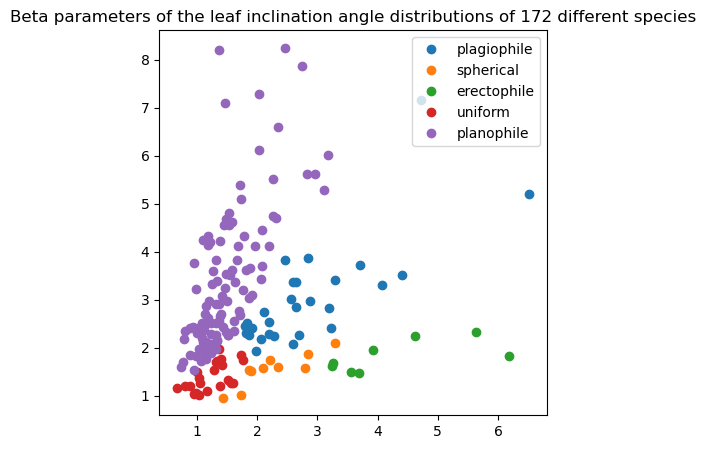

In [25]:
import geomstats.datasets.utils as data_utils

beta_param, distrib_type = data_utils.load_leaves()

fig = plt.figure(figsize=(5, 5))
for distrib in set(distrib_type):
    points = beta_param[distrib_type == distrib, :]
    plt.plot(points[:, 0], points[:, 1], "o", label=distrib)
plt.title(
    "Beta parameters of the leaf inclination angle distributions of 172 different species"
)
plt.legend();

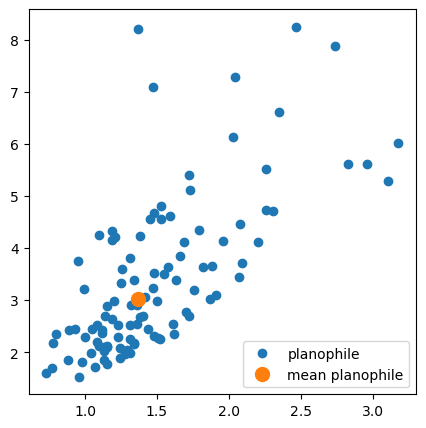

In [26]:
from geomstats.learning.frechet_mean import FrechetMean

points_plan = beta_param[distrib_type == "planophile", :]

mean = FrechetMean(beta)
mean.fit(points_plan)

mean_estimate = mean.estimate_

fig = plt.figure(figsize=(5, 5))
plt.plot(points_plan[:, 0], points_plan[:, 1], "o", label="planophile")
plt.plot(*mean_estimate, "o", markersize=10, label="mean planophile")
plt.legend();

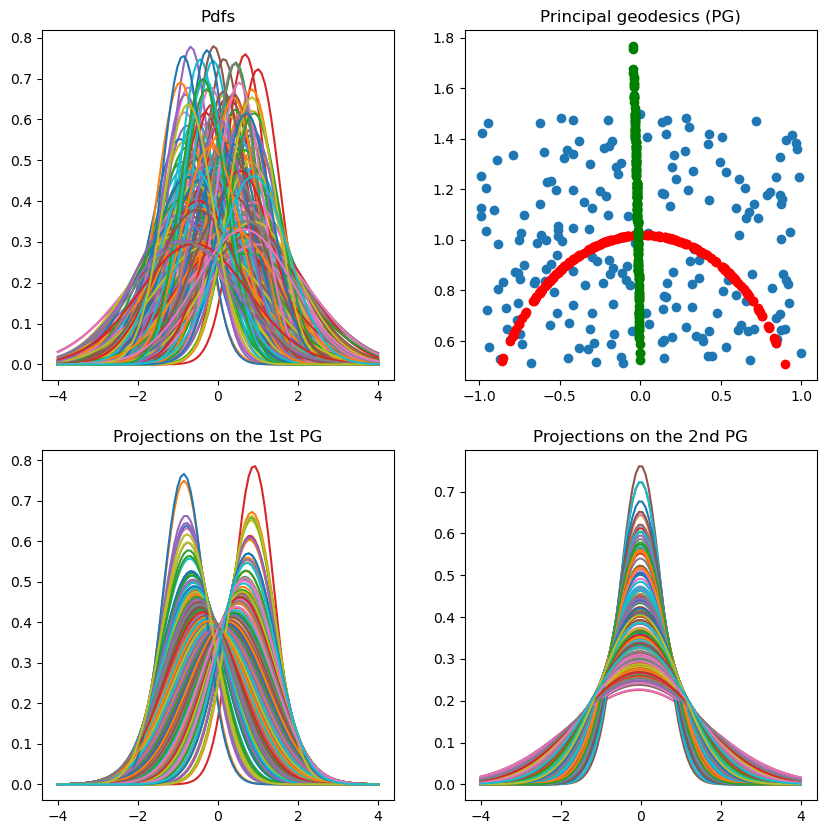

In [27]:
from geomstats.learning.pca import HyperbolicPlaneExactPGA

n_points = 200

means = -1.0 + 2.0 * gs.random.rand(n_points)
stds = 0.5 + gs.random.rand(n_points)
points = gs.transpose(gs.stack((means, stds)))

samples = gs.linspace(-4.0, 4.0, 100)
pdfs = normal.point_to_pdf(points)(samples)

fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(221)
ax1.plot(samples, pdfs.T)
ax1.set_title("Pdfs")

pca = HyperbolicPlaneExactPGA(normal)
proj_points = pca.fit_transform(points)

ax2 = fig.add_subplot(222)
ax2.plot(points[:, 0], points[:, 1], "o")
ax2.plot(proj_points[0, :, 0], proj_points[0, :, 1], "or")
ax2.plot(proj_points[1, :, 0], proj_points[1, :, 1], "og")
ax2.set_title("Principal geodesics (PG)")

proj_pdfs_1 = normal.point_to_pdf(proj_points[0])(samples)
proj_pdfs_2 = normal.point_to_pdf(proj_points[1])(samples)

ax3 = fig.add_subplot(223)
ax3.plot(samples, proj_pdfs_1.T)
ax3.set_title("Projections on the 1st PG")

ax4 = fig.add_subplot(224)
ax4.plot(samples, proj_pdfs_2.T)
ax4.set_title("Projections on the 2nd PG")
plt.show()